### Assestment time evaluation

All'accensione il numero di conteggi rivelati dai vari canali è sempre superiore a quello effettivo: l'obiettivo è quello di stimare il tempo di assestamento per evitare che si prendano misure quando il sistema non si è ancora stabilizzato.



<IPython.core.display.Javascript object>


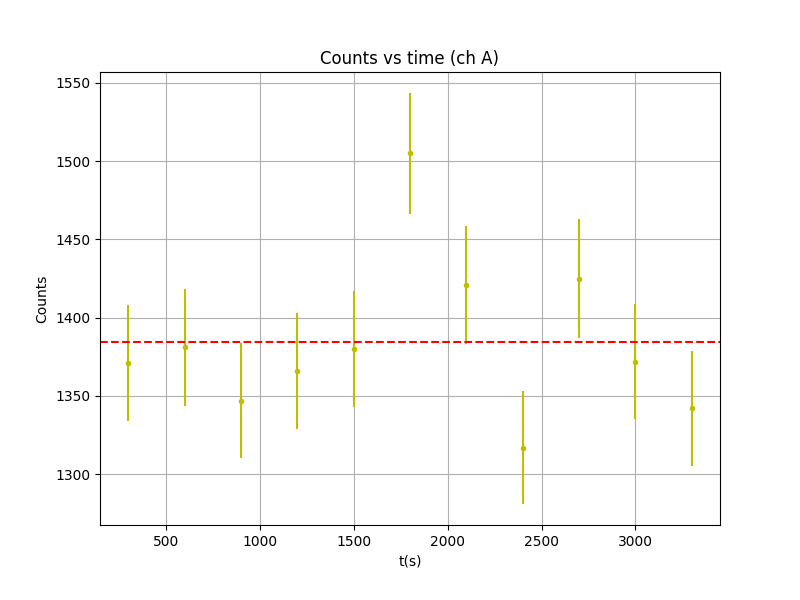

parametro fit per numero di conteggi ogni 300 s per il fotomoltiplicatore A: 1384.2727272742172


<IPython.core.display.Javascript object>


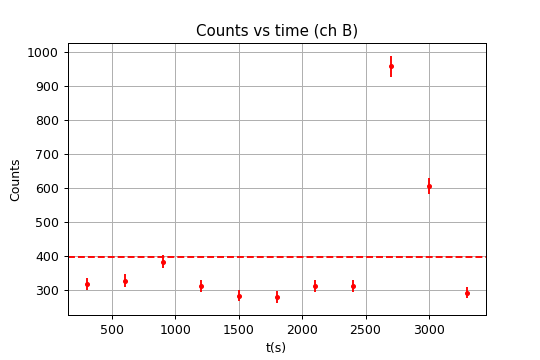

parametro fit per numero di conteggi ogni 300 s per il fotomoltiplicatore B: 398.54545454566727


<IPython.core.display.Javascript object>


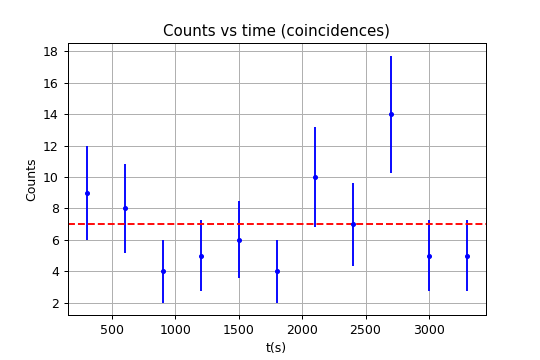

parametro fit per numero di conteggi ogni 300 s per la coincidenza: 7.000000000013089


<IPython.core.display.Javascript object>


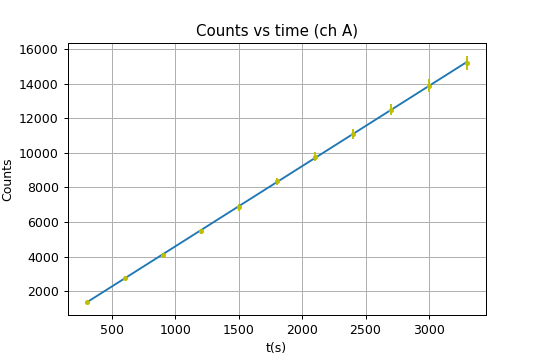

parametri fit lineare per il fotomoltiplicatore A:
 coefficente angolare: 4.643212121220068 
 intercetta: -51.78181818193451


<IPython.core.display.Javascript object>


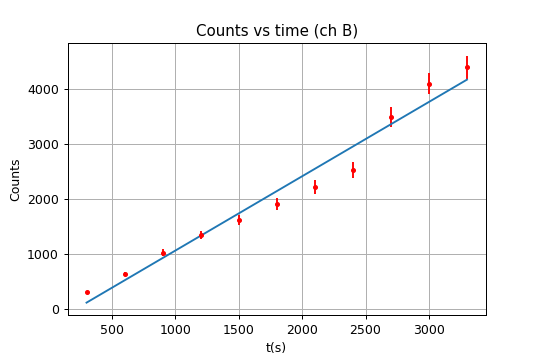

parametri fit lineare per il fotomoltiplicatore B:
 coefficente angolare: 1.3469696969704539 
 intercetta: -282.72727272789166


<IPython.core.display.Javascript object>


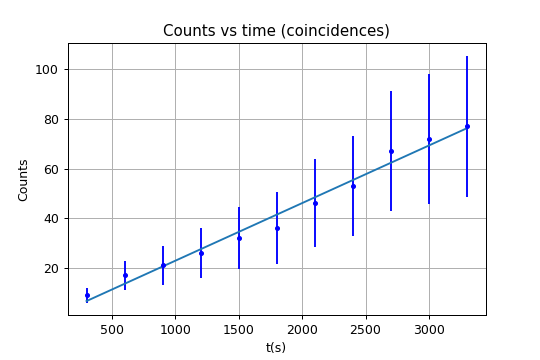

parametri fit lineare per la coincidenza:
 coefficente angolare: 0.02321212120999072 
 intercetta: -0.3272727272756182


In [29]:

%matplotlib notebook


import matplotlib.pyplot as plt
import numpy as np
import array as arr
import math

from numpy import exp, linspace, random, loadtxt, pi, sqrt, arctan
from lmfit.model import load_model
from lmfit import Model, Minimizer, Parameters, report_fit
from scipy import optimize, stats
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

presa_dati_1 = open('assestT.txt')

#conteggi DOPO aver superato il tempo di assestamento: mi aspetto siano circa costanti

t,nA,nB,nC = np.loadtxt(presa_dati_1, unpack=True, usecols=(0,1,2,3)) #tempo, ch A, ch B e coincidenze
uA = np.sqrt(nA) #incertezze sui conteggi sono la loro radice
uB = np.sqrt(nB)
uC = np.sqrt(nC)

def fitf(x,b):  #numero di conteggi deve essere costante una volta superato il tempo di assestamento
   return b


#fit channel A
fit_parsA, fit_pars_covA = curve_fit(fitf, t, nA)
b1=fit_parsA[0]

#fit channel B
fit_parsB, fit_pars_covB = curve_fit(fitf, t, nB)
b2=fit_parsB[0]

#fit coincidences
fit_parsC, fit_pars_covC = curve_fit(fitf, t, nC)
b3=fit_parsC[0]

#plot



f1=plt.figure(1)
plt.title('Counts vs time (ch A)')
plt.errorbar(t,nA,yerr=uA,fmt='yo',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.axhline(b1, color='r', linestyle='--')

print("parametro fit per numero di conteggi ogni 300 s per il fotomoltiplicatore A:", b1)


f2=plt.figure(2)
plt.title('Counts vs time (ch B)')
plt.errorbar(t,nB,yerr=uB,fmt='ro',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.axhline(b2, color='r', linestyle='--')

print("parametro fit per numero di conteggi ogni 300 s per il fotomoltiplicatore B:", b2)



f3=plt.figure(3)
plt.title('Counts vs time (coincidences)')
plt.errorbar(t,nC,yerr=uC,fmt='bo',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.show()
plt.axhline(b3, color='r', linestyle='--')

print("parametro fit per numero di conteggi ogni 300 s per la coincidenza:", b3)


#plot lineare

nA_retta= [0 for i in range(0,len(nA))]
nB_retta= [0 for i in range(0,len(nB))]
nC_retta= [0 for i in range(0,len(nC))]

nA_retta[0]=nA[0]
nB_retta[0]=nB[0]
nC_retta[0]=nC[0]

uA_linear= [0 for i in range(0,len(uA))]
uB_linear= [0 for i in range(0,len(uB))]
uC_linear= [0 for i in range(0,len(uC))]


uA_linear[0]=uA[0]
uB_linear[0]=uB[0]
uC_linear[0]=uC[0]



for i in range(1,len(nA)):
    nA_retta[i]=nA[i]+nA_retta[i-1]    
    uA_linear[i]=uA[i]+uA_linear[i-1]
    
for i in range(1,len(nB)):
    nB_retta[i]=nB[i]+nB_retta[i-1]    
    uB_linear[i]=uB[i]+uB_linear[i-1]
    
for i in range(1,len(nC)):
    nC_retta[i]=nC[i]+nC_retta[i-1]    
    uC_linear[i]=uC[i]+uC_linear[i-1]
    
def fitlinearf(x,a,c):
    return a*x+c
    
#fit channel A
fit_parsA_l, fit_pars_covA_l = curve_fit(fitlinearf, t, nA_retta)
a1=fit_parsA_l[0]
c1=fit_parsA_l[1]


#fit channel B
fit_parsB_l, fit_pars_covB_l = curve_fit(fitlinearf, t, nB_retta)
a2=fit_parsB_l[0]
c2=fit_parsB_l[1]

#fit coincidences
fit_parsC_l, fit_pars_covC_l = curve_fit(fitlinearf, t, nC_retta)
a3=fit_parsC_l[0]
c3=fit_parsC_l[1]

#plot
fr1=plt.figure(4)
plt.title('Counts vs time (ch A)')
plt.errorbar(t,nA_retta,yerr=uA_linear,fmt='yo',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.plot(t, a1*t+c1)

print("parametri fit lineare per il fotomoltiplicatore A:\n coefficente angolare:", a1, "\n intercetta:", c1)


fr2=plt.figure(5)
plt.title('Counts vs time (ch B)')
plt.errorbar(t,nB_retta,yerr=uB_linear,fmt='ro',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.plot(t, a2*t+c2)

print("parametri fit lineare per il fotomoltiplicatore B:\n coefficente angolare:", a2, "\n intercetta:", c2)


fr3=plt.figure(6)
plt.title('Counts vs time (coincidences)')
plt.errorbar(t,nC_retta,yerr=uC_linear,fmt='bo',markersize=3)
plt.grid(True)
plt.xlabel('t(s)')
plt.ylabel('Counts')
plt.show()
plt.plot(t, a3*t+c3)

print("parametri fit lineare per la coincidenza:\n coefficente angolare:", a3, "\n intercetta:", c3)


presa_dati_1.close()